# Exepected Calibration Error(ECE) and Maximum Calibration Error (MCE)

## Theoretical Background

(True) Expected Calibration Error is defined as the average difference between the predicted probability and the true probability for a particular class. We will label the predicted probability as $\hat{P}$ and the true probability as $P$ and drop the class of interest label for simplicity.

$$
\text{ECE} = \mathbb{E}_{\hat{P}} [|\mathbb{P}(\hat{Y}=Y|\hat{P}=p)-p|] = \int_0^1 |\mathbb{P}(\hat{Y}=Y|\hat{P}=p)-p| \, dF_{\hat{P}}(p)
$$

Some also define the ECE as the average difference between the predicted probability and the true probability of the predicted class. This is similar to the top-class vs class-by-class reliability diagram. We will refer to it as $\text{ECE}_{top}$.

$$
\text{ECE}_{top} = \mathbb{E}_{\hat{P_{top}}} [|\mathbb{P}(\hat{Y_{top}}=Y_{top}|\hat{P_{top}}=p_{top})-p_{top}|])
$$

Similarly, we can also define the Maximum Calibration Error (MCE) as the maximum difference between the predicted and true probabilities:

$$
\text{MCE} = \max_p |\mathbb{P}(\hat{Y}=Y|\hat{P}=p)-p|
$$

$$
\text{MCE}_{top} = \max_{p_{top}}|\mathbb{P}(\hat{Y_{top}}=Y_{top}|\hat{P}=p_{top})-p_{top}|
$$

### Estimated ECE and MCE

We can't compute ECE and MCE directly from the data. Alternatively, we can group the data into bins and compute an Estimated ECE and MCE from the grouped data. In most literature, the estimated ECE and MCE are simply referred to as ECE and MCE. We adopt the same convention but want to remind the reader that the estimated ECE and MCE are not the same as the true ECE and MCE and they heavily depend on the binning method. In the text below, we will use the terms ECE and MCE to refer to the estimated ECE and MCE, and true ECE and MCE to refer to the true ECE and MCE.

$$\text{ECE}  = \sum_{m=1}^M \frac{|B_m|}{n} |acc(B_m) - conf(B_m)|$$

where M is the number of bins, $B_m$ is the m-th bin, $acc(B_m)$ is the accuracy of the m-th bin, $conf(B_m)$ is the mean predicted probability of the m-th bin, and $n$ is the total number of samples. The ECE-topclass is a simple extension where only the top-class probability is used to group the data. We can define MCE similarly.

$$\text{MCE}  = \max_m |acc(B_m) - conf(B_m)|$$


Both ECE and MCE group the data based on the predicted probability. This means the resulting ECE and MCE depend on the binning method used. Traditionally, the data are grouped into 10 equal-width bins. However, if the data is not evenly distributed, the resulting ECE and MCE may not be a good representation of the model's calibration. 

Nixon et al. (2019) proposed a new binning method which bins the data into equal-count bins. They refer to the resulting ECE as Adaptive Calibration Error (ACE). The ACE also accounts for all the predictions for all classes. This is equivalent to a sum of ECE for all classes. 

We will adopt a modified version of the ACE and aim to measure the true ECE with equal-count binning but ignore the part about summing over all classes. This is equivalent to the ECE but only with equal-count binning. We will refer to the equal-width binning ECE as ECE-H and the equal-count binning ECE as ECE-C. Similarly, we will refer to the equal-width binning MCE as MCE-H and the equal-count binning MCE as MCE-C.

## Pros of ECE and MCE

ECE and MCE are perhaps the most intuitive metrics for measuring the calibration of a probabilistic model. They are simply the average deviation of the predicted probability from the true probability and the maximum deviation of the predicted probability from the true probability. The ECE and MCE are also easy to compute and interpret. ECE could be computed by doing a weighted average of the reliability diagram based on bin counts and MCE is just the maximum difference between the accuracy and the confidence. Because of that, ECE and MCE are widely used in the machine learning literature.

## Cons of ECE and MCE

The biggest disadvantage of using ECE and MCE is that they rely on the binning scheme, and results will depend on the binning scheme and the number of bins. It can be shown that the average ECE and MCE will always increase with the number of bins and the average ECE and MCE will change with the number of samples for a fixed number of bins. This causes problems when interpreting the results. We will do a simple experiment in the following section to show this. Because of the above reasons, we recommend using ECE and MCE with other metrics that are not dependent on the binning scheme.

## Calculating ECE and MCE with calzone

There is two way to calculate the ECE and MCE in calzone. The first way is by calling the function explicitly.

In [2]:
from calzone.utils import reliability_diagram,data_loader
from calzone.metrics import calculate_ece_mce
import numpy as np

### loading the data
wellcal_dataloader = data_loader(data_path="../../../example_data/simulated_welldata.csv")

### calculating the top-class ECE-H
reliability,confindence,bin_edges,bin_counts = reliability_diagram(wellcal_dataloader.labels,wellcal_dataloader.probs,num_bins=10, class_to_plot=None, is_equal_freq=False)
ece_h_top_class,mce_h_top_class = calculate_ece_mce(reliability,confindence,bin_counts=bin_counts)
print("Top-class ECE-H: ",ece_h_top_class)
print("Top-class MCE-H: ",mce_h_top_class)

Top-class ECE-H:  0.009608653731328977
Top-class MCE-H:  0.03926468843081976


In [3]:
### We can calculate the class 1 ECE and MCE by setting class_to_plot=1
reliability,confindence,bin_edges,bin_counts = reliability_diagram(wellcal_dataloader.labels,wellcal_dataloader.probs,num_bins=10, class_to_plot=1, is_equal_freq=False)
ece_h_classone,mce_h_classone = calculate_ece_mce(reliability,confindence,bin_counts=bin_counts)
print("Class 1 ECE-H: ",ece_h_classone)
print("Class 1 MCE-H: ",mce_h_classone)

Class 1 ECE-H:  0.01208775955804901
Class 1 MCE-H:  0.04848338618970194


In [4]:
### Similarily we can calculate the class 1 ECE-C and top-class ECE-C by setting is_equal_freq=True
reliability,confindence,bin_edges,bin_counts = reliability_diagram(wellcal_dataloader.labels,wellcal_dataloader.probs,num_bins=10, class_to_plot=None, is_equal_freq=True)
ece_c_top_class,mce_c_top_class = calculate_ece_mce(reliability,confindence,bin_counts=bin_counts)
reliability,confindence,bin_edges,bin_counts = reliability_diagram(wellcal_dataloader.labels,wellcal_dataloader.probs,num_bins=10, class_to_plot=1, is_equal_freq=True)
ece_c_classone,mce_c_classone = calculate_ece_mce(reliability,confindence,bin_counts=bin_counts)
print("Top-class ECE-C: ",ece_c_top_class)
print("Top-class MCE-C: ",mce_c_top_class)
print("Class 1 ECE-C: ",ece_c_classone)
print("Class 1 MCE-C: ",mce_c_classone)

Top-class ECE-C:  0.009458033653818828
Top-class MCE-C:  0.020515047600205505
Class 1 ECE-C:  0.008733966945443138
Class 1 MCE-C:  0.02324031223486256


The second method is much simpler. We can use the calzone.metrics.CalibrationMetrics class to calculate all type of metrics.

In [7]:
from calzone.metrics import CalibrationMetrics
calmetrics = CalibrationMetrics()
calmetrics.calculate_metrics(wellcal_dataloader.labels, wellcal_dataloader.probs, metrics=['ECE-H', 'MCE-H', 'ECE-C', 'MCE-C'])

{'ECE-H topclass': 0.009608653731328977,
 'ECE-H': 0.01208775955804901,
 'MCE-H topclass': 0.03926468843081976,
 'MCE-H': 0.04848338618970194,
 'ECE-C topclass': 0.009458033653818828,
 'ECE-C': 0.008733966945443138,
 'MCE-C topclass': 0.020515047600205505,
 'MCE-C': 0.02324031223486256}

## ECE and MCE as function of bin size

In this section, we want to quickly demonstrate how binning could affect the ECE and MCE.

In [11]:
range_of_binning = np.arange(10,300,1)
result = np.zeros((len(range_of_binning),8))
for i in range(len(range_of_binning)):
    calmetrics = CalibrationMetrics(class_to_calculate=1,num_bins=range_of_binning[i])
    result[i,:] = calmetrics.calculate_metrics(wellcal_dataloader.labels, wellcal_dataloader.probs, metrics=['ECE-H', 'MCE-H', 'ECE-C', 'MCE-C'],return_numpy=True)

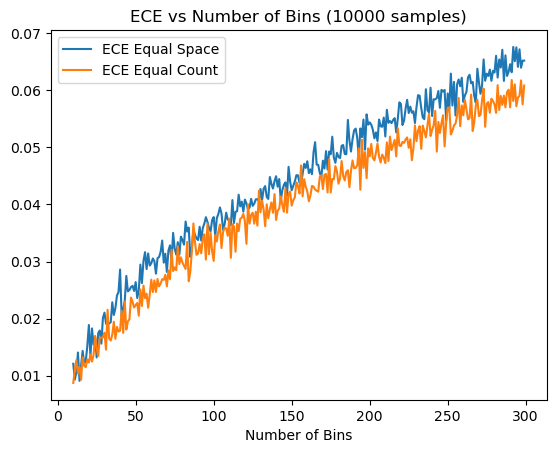

In [12]:
import matplotlib.pyplot as plt
plt.plot(range_of_binning,result[:,1], label='ECE Equal Width')
plt.plot(range_of_binning,result[:,5], label='ECE Equal Count')
plt.title('ECE vs Number of Bins (10000 samples)')
#plt.ylim(0, np.max(ece_equal_width)+0.1)
plt.xlabel('Number of Bins')
plt.legend()

We can see that the error goes up as the number of bins increases while equal count and equal width always return different results. Opposite effects can be observed for the number of sample. Therefore, ECE and MCE can only give us a rough estimate of the calibation error of the model.

## Reference
Guo, C., Pleiss, G., Sun, Y., & Weinberger, K. Q. (2017). On Calibration of Modern Neural Networks (No. arXiv:1706.04599). arXiv. http://arxiv.org/abs/1706.04599

Pakdaman Naeini, M., Cooper, G., & Hauskrecht, M. (2015). Obtaining Well Calibrated Probabilities Using Bayesian Binning. Proceedings of the AAAI Conference on Artificial Intelligence, 29(1). https://doi.org/10.1609/aaai.v29i1.9602

Arrieta-Ibarra, I., Gujral, P., Tannen, J., Tygert, M., & Xu, C. (2022). Metrics of Calibration for Probabilistic Predictions.

Nixon, J., Dusenberry, M. W., Zhang, L., Jerfel, G., & Tran, D. (2020). Measuring Calibration in Deep Learning.


